## Befor starting we need to import all the required libraries.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data which we manually organized in excel file from SEC's EDGAR database.

In [46]:
df= pd.read_excel('/content/BCG_final_values.xlsx')

#### Find the Null values, if there are NAN then Run remove the # and then run the code again.

In [47]:
#df.dropna(inplace=True)
df.isnull().sum()

,0
Year,0
Company,0
Total ravenue (million$),0
Net Income (million$),0
Total Assets (million$),0
Total Liabilities (million$),0
Cash Flow (million$),0


#### converting the float value of Year to integer.

In [48]:
df["Year"] =df["Year"].astype(int)

In [49]:
df

,Year,Company,Total ravenue (million$),Net Income (million$),Total Assets (million$),Total Liabilities (million$),Cash Flow (million$)
0,2023,Microsoft,211915,72361.0,411976.0,205753.0,87582.0
1,2023,Tesla,96773,14974.0,106618.0,43009.0,13256.0
2,2023,Apple,383285,96995.0,352583.0,290437.0,110543.0
3,2022,Microsoft,198270,72738.0,364840.0,198298.0,89035.0
4,2022,Tesla,81462,12556.0,82338.0,36440.0,14724.0
5,2022,Apple,394328,99803.0,352755.0,302083.0,122151.0
6,2021,Microsoft,168088,61271.0,333779.0,191791.0,76740.0
7,2021,Tesla,53821,5519.0,62131.0,30548.0,11497.0
8,2021,Apple,365817,94680.0,351002.0,287912.0,104038.0


In [50]:
df["Total ravenue (million$)"][3]

198270

#### Simply describe and stick to 2 values after decimal.

In [51]:
round(df.describe(),2)

,Year,Net Income (million$),Total Assets (million$),Total Liabilities (million$),Cash Flow (million$)
count,9.00,9.00,9.00,9.00,9.00
mean,2022.00,58988.56,268669.11,176252.33,69951.78
std,0.87,38258.21,140780.65,112621.13,44632.99
min,2021.00,5519.00,62131.00,30548.00,11497.00
25%,2021.00,14974.00,106618.00,43009.00,14724.00
50%,2022.00,72361.00,351002.00,198298.00,87582.00
75%,2023.00,94680.00,352755.00,287912.00,104038.00
max,2023.00,99803.00,411976.00,302083.00,122151.00


### Calculating the growth %.

In [52]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total ravenue (million$)'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income (million$)'].pct_change() * 100

In [53]:
df

,Year,Company,Total ravenue (million$),Net Income (million$),Total Assets (million$),Total Liabilities (million$),Cash Flow (million$),Revenue Growth (%),Net Income Growth (%)
0,2023,Microsoft,211915,72361.0,411976.0,205753.0,87582.0,NaN,NaN
1,2023,Tesla,96773,14974.0,106618.0,43009.0,13256.0,NaN,NaN
2,2023,Apple,383285,96995.0,352583.0,290437.0,110543.0,NaN,NaN
3,2022,Microsoft,198270,72738.0,364840.0,198298.0,89035.0,-6.438902,0.520999
4,2022,Tesla,81462,12556.0,82338.0,36440.0,14724.0,-15.821562,-16.147990
5,2022,Apple,394328,99803.0,352755.0,302083.0,122151.0,2.881146,2.894995
6,2021,Microsoft,168088,61271.0,333779.0,191791.0,76740.0,-15.222676,-15.764800
7,2021,Tesla,53821,5519.0,62131.0,30548.0,11497.0,-33.931158,-56.044919
8,2021,Apple,365817,94680.0,351002.0,287912.0,104038.0,-7.230275,-5.133112


### Calculating the Growth % of Assets, Liability, and Cash flow from operating activities.

In [56]:
df['Assets Growth (%)'] = df.groupby(['Company'])['Total Assets (million$)'].pct_change() * 100
df['Liability Growth (%)'] = df.groupby(['Company'])['Total Liabilities (million$)'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby(['Company'])['Cash Flow (million$)'].pct_change() * 100


In [57]:
df

,Year,Company,Total ravenue (million$),Net Income (million$),Total Assets (million$),Total Liabilities (million$),Cash Flow (million$),Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liability Growth (%),Cash Flow Growth (%)
0,2023,Microsoft,211915,72361.0,411976.0,205753.0,87582.0,NaN,NaN,NaN,NaN,NaN
1,2023,Tesla,96773,14974.0,106618.0,43009.0,13256.0,NaN,NaN,NaN,NaN,NaN
2,2023,Apple,383285,96995.0,352583.0,290437.0,110543.0,NaN,NaN,NaN,NaN,NaN
3,2022,Microsoft,198270,72738.0,364840.0,198298.0,89035.0,-6.438902,0.520999,-11.441443,-3.623276,1.659017
4,2022,Tesla,81462,12556.0,82338.0,36440.0,14724.0,-15.821562,-16.147990,-22.772890,-15.273547,11.074231
5,2022,Apple,394328,99803.0,352755.0,302083.0,122151.0,2.881146,2.894995,0.048783,4.009820,10.500891
6,2021,Microsoft,168088,61271.0,333779.0,191791.0,76740.0,-15.222676,-15.764800,-8.513595,-3.281425,-13.809176
7,2021,Tesla,53821,5519.0,62131.0,30548.0,11497.0,-33.931158,-56.044919,-24.541524,-16.169045,-21.916599
8,2021,Apple,365817,94680.0,351002.0,287912.0,104038.0,-7.230275,-5.133112,-0.496945,-4.691095,-14.828368


#### As it is clear that the data have Nan or Null values so we will replace these with zero.

In [61]:
df.fillna(0,inplace=True)

In [62]:
df

,Year,Company,Total ravenue (million$),Net Income (million$),Total Assets (million$),Total Liabilities (million$),Cash Flow (million$),Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liability Growth (%),Cash Flow Growth (%)
0,2023,Microsoft,211915,72361.0,411976.0,205753.0,87582.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,2023,Tesla,96773,14974.0,106618.0,43009.0,13256.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,2023,Apple,383285,96995.0,352583.0,290437.0,110543.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,2022,Microsoft,198270,72738.0,364840.0,198298.0,89035.0,-6.438902,0.520999,-11.441443,-3.623276,1.659017
4,2022,Tesla,81462,12556.0,82338.0,36440.0,14724.0,-15.821562,-16.147990,-22.772890,-15.273547,11.074231
5,2022,Apple,394328,99803.0,352755.0,302083.0,122151.0,2.881146,2.894995,0.048783,4.009820,10.500891
6,2021,Microsoft,168088,61271.0,333779.0,191791.0,76740.0,-15.222676,-15.764800,-8.513595,-3.281425,-13.809176
7,2021,Tesla,53821,5519.0,62131.0,30548.0,11497.0,-33.931158,-56.044919,-24.541524,-16.169045,-21.916599
8,2021,Apple,365817,94680.0,351002.0,287912.0,104038.0,-7.230275,-5.133112,-0.496945,-4.691095,-14.828368


# The summary and insights of our outcomes are below

In [76]:
company_summary = df.groupby('Company').agg({
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean',
    'Assets Growth (%)': 'mean',
    'Liability Growth (%)': 'mean',
    'Cash Flow Growth (%)': 'mean'
}).reset_index()

print("\nSummary of Financial Trends by Company:")
print(pd.DataFrame(company_summary))


# Add further analysis based on the company summary, for easily understanding
print("\nAnalysis of Trends:")
for company in company_summary['Company'].unique():
  company_data = company_summary[company_summary['Company'] == company]
  print(f"\n{company}:")

  print(f"- Average Revenue Growth: {company_data['Revenue Growth (%)'].values[0]:.2f}%")
  print(f"- Average Net Income Growth: {company_data['Net Income Growth (%)'].values[0]:.2f}%")
  print(f"- Average Asset Growth: {company_data['Assets Growth (%)'].values[0]:.2f}%")
  print(f"- Average Liability Growth: {company_data['Liability Growth (%)'].values[0]:.2f}%")
  print(f"- Average Cash Flow Growth: {company_data['Cash Flow Growth (%)'].values[0]:.2f}%")



Summary of Financial Trends by Company:
     Company  Revenue Growth (%)  Net Income Growth (%)  Assets Growth (%)  \
0      Apple           -1.449710              -0.746039          -0.149388   
1  Microsoft           -7.220526              -5.081267          -6.651679   
2      Tesla          -16.584240             -24.064303         -15.771471   

   Liability Growth (%)  Cash Flow Growth (%)  
0             -0.227092             -1.442492  
1             -2.301567             -4.050053  
2            -10.480864             -3.614123  

Analysis of Trends:

Apple:
- Average Revenue Growth: -1.45%
- Average Net Income Growth: -0.75%
- Average Asset Growth: -0.15%
- Average Liability Growth: -0.23%
- Average Cash Flow Growth: -1.44%

Microsoft:
- Average Revenue Growth: -7.22%
- Average Net Income Growth: -5.08%
- Average Asset Growth: -6.65%
- Average Liability Growth: -2.30%
- Average Cash Flow Growth: -4.05%

Tesla:
- Average Revenue Growth: -16.58%
- Average Net Income Growth: -2

# Graph or visualization are the easiest way of getting the insights, Following are the visualizations.

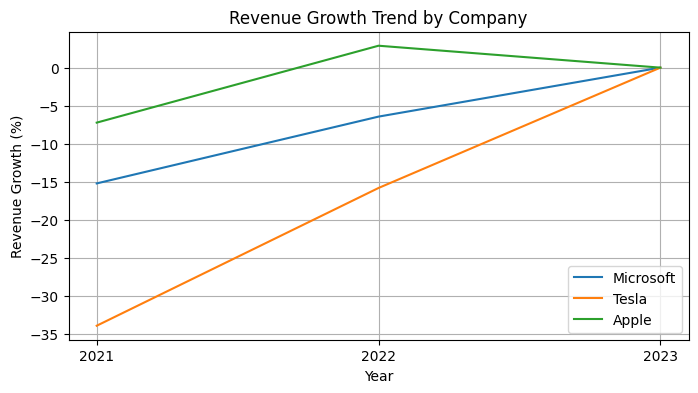

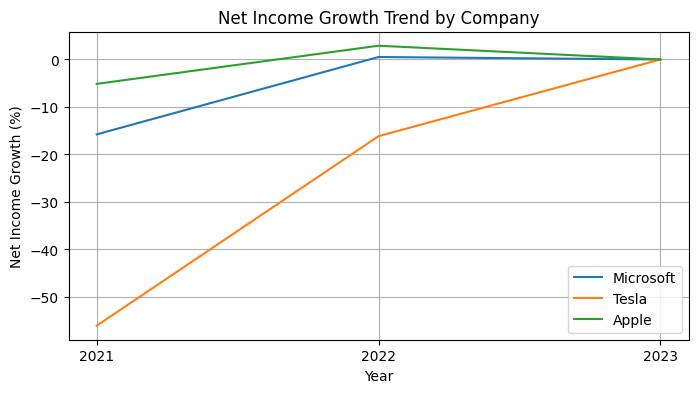

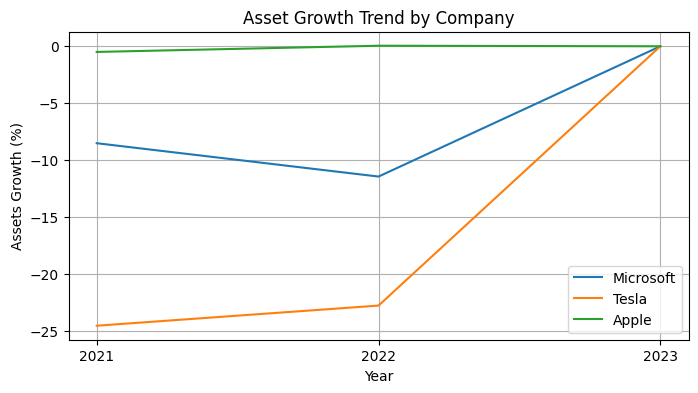

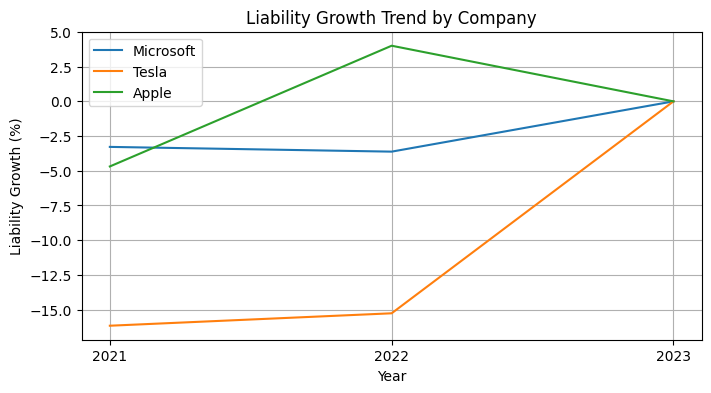

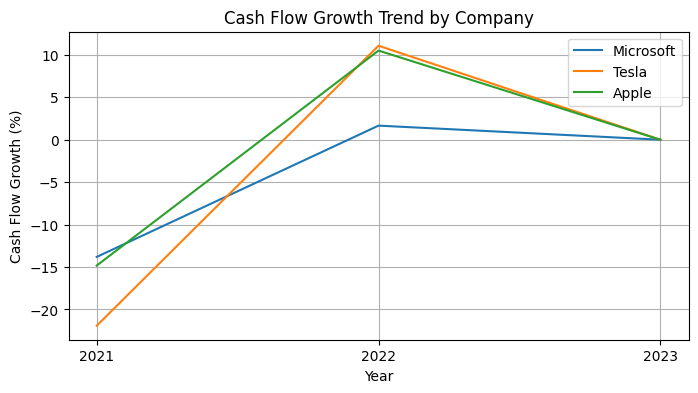

In [78]:
plt.figure(figsize=(8, 4))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Year'], company_data['Revenue Growth (%)'], label=company)

plt.xlabel('Year')
plt.ylabel('Revenue Growth (%)')
plt.title('Revenue Growth Trend by Company')
plt.legend()
plt.grid(True)
plt.xticks(df['Year'].unique())
plt.show()


# Visualize Net Income Growth Trend
plt.figure(figsize=(8, 4))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Year'], company_data['Net Income Growth (%)'], label=company)

plt.xlabel('Year')
plt.ylabel('Net Income Growth (%)')
plt.title('Net Income Growth Trend by Company')
plt.legend()
plt.grid(True)
plt.xticks(df['Year'].unique())
plt.show()


# Visualize Asset Growth Trend
plt.figure(figsize=(8, 4))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Year'], company_data['Assets Growth (%)'], label=company)

plt.xlabel('Year')
plt.ylabel('Assets Growth (%)')
plt.title('Asset Growth Trend by Company')
plt.legend()
plt.grid(True)
plt.xticks(df['Year'].unique())
plt.show()


# Visualize Liability Growth Trend
plt.figure(figsize=(8, 4))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Year'], company_data['Liability Growth (%)'], label=company)

plt.xlabel('Year')
plt.ylabel('Liability Growth (%)')
plt.title('Liability Growth Trend by Company')
plt.legend()
plt.grid(True)
plt.xticks(df['Year'].unique())
plt.show()


# Visualize Cash Flow Growth Trend
plt.figure(figsize=(8, 4))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Year'], company_data['Cash Flow Growth (%)'], label=company)

plt.xlabel('Year')
plt.ylabel('Cash Flow Growth (%)')
plt.title('Cash Flow Growth Trend by Company')
plt.legend()
plt.grid(True)
plt.xticks(df['Year'].unique())
plt.show()


# Whole summary

To analyze the financial performance trends for Apple, Microsoft, and Tesla, I manually extracted key financial data from their 10-K filings for the last three fiscal years using the SEC’s EDGAR database. I focused on Total Revenue, Net Income, Total Assets, Total Liabilities, and Cash Flow from Operating Activities for each company. I then compiled this data into a spreadsheet for easy reference.

### Methodology
**Data Collection:** I navigated through each company’s filings, locating the relevant financial data from the consolidated statements sections.

**Data Analysis:** Using Python’s pandas library in Jupyter Notebook, I loaded the data into a DataFrame and calculated the percentage changes year-over-year for each financial metric. This allowed me to observe how the figures evolved over time.

**Trend Analysis:** I then computed the average growth rates for each metric to capture the general direction and performance of each company’s financial health.

### The average growth rates highlight the companies' performance trends:

**Apple:** Shows slight declines in revenue, net income, assets, and cash flow, indicating a stable but slightly downward trend in its recent financial performance.

**Microsoft:** Exhibits more significant drops across all metrics, which may point to challenges in sustaining growth or profitability during the last three fiscal years.

**Tesla:** Experiences the most considerable declines, especially in revenue and net income, suggesting that it faced difficulties in maintaining its financial momentum.